In [1194]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1195]:
import numpy as np
import matplotlib.pyplot as plt

from neuron_population import NeuronPopulation
from connectome import Connectome
from overhead import Simulation

In [1196]:
dt = 0.1

In [1197]:
# Neuron population parameters
layer_distribution = [10, 10]
n_layers = 2
neuron_types = ["p23", "TRN", "b", "nb"]
n_neuron_types = len(neuron_types)
inhibitory = [False, False, True, True]
dist_layer1 = np.array([60, 20, 10, 10])
dist_layer2 = np.array([40, 40, 10, 10])
neuron_distribution = [dist_layer1, dist_layer2]
threshold_decay = np.exp(-dt / 1)
layer_distances = np.zeros((n_layers, n_layers))
# mm
layer_distances[0, 0] = 0.6
layer_distances[1, 1] = 0.6
layer_distances[0, 1] = 5.0
layer_distances[1, 0] = 5.0

In [1198]:
neuron_pop = NeuronPopulation(
    layer_distribution,
    neuron_distribution,
    layer_distances,
    neuron_types,
    inhibitory,
    threshold_decay,
    threshold_mult=1.0
)

In [1199]:
# Connectome
max_synapses = 5
synapse_strength = np.ones((n_layers, n_layers))
# neuron_types = ["p23", "TRN", "b", "nb"]
connectivity_probability = np.zeros((n_layers, n_layers, n_neuron_types, n_neuron_types))
connectivity_probability[0, 0, 0, 0] = 60
connectivity_probability[0, 0, 1, 0] = 1
connectivity_probability[0, 0, 2, 0] = 9
connectivity_probability[0, 0, 3, 0] = 5

connectivity_probability[0, 0, 0, 0] = 60
connectivity_probability[0, 0, 0, 1] = 1
connectivity_probability[0, 0, 0, 2] = 9
connectivity_probability[0, 0, 0, 3] = 5

connectivity_probability[1, 1, 0, 0] = 60
connectivity_probability[1, 1, 1, 0] = 1
connectivity_probability[1, 1, 2, 0] = 9
connectivity_probability[1, 1, 3, 0] = 5

connectivity_probability[1, 1, 0, 0] = 60
connectivity_probability[1, 1, 0, 1] = 1
connectivity_probability[1, 1, 0, 2] = 9
connectivity_probability[1, 1, 0, 3] = 5

In [1200]:
neuron_pop.type_from_neuron_index(0)

np.str_('TRN')

In [1201]:
connectome = Connectome(
    max_synapses,
    neuron_pop,
    connectivity_probability,
    synapse_strength,
)

In [1202]:
sim = Simulation(connectome, dt, stepper_type="adapt")

In [1203]:
I_ext = 35

for i in range(10000):
    sim.step(I_ext=I_ext)

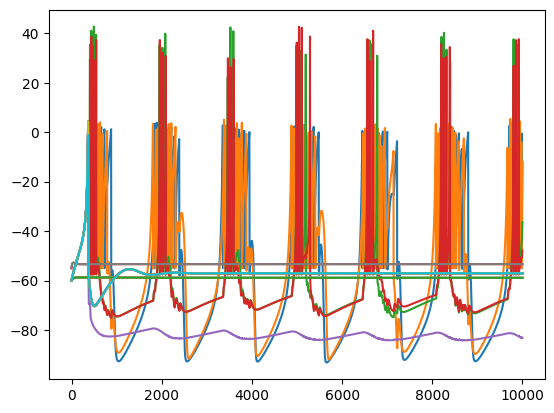

In [1204]:
plt.plot(sim.stats.Vs)
plt.show()